<a href="https://colab.research.google.com/github/hmoughnieh/ISYE7406_Project/blob/main/ISYE7406_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [20]:
#Plots
import plotly.express as px
import seaborn as sns

In [15]:
 pip install imblearn

In [59]:
import seaborn as sns
sns.__version__

'0.12.2'

In [2]:
#load libraries
import pandas as pd
import numpy as np
from collections import Counter
from imblearn import under_sampling
import random

In [37]:
#load dataset
df = pd.read_csv('bs140513_032310.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


# Data processing


In [38]:
df.shape

(594643, 10)

In [39]:
#Check the unique values in each column
print(df.zipcodeOri.unique())
print(df.zipMerchant.unique())
print(df.gender.unique())
print(df.step.unique())
print(df.age.unique())
print(df.category.unique())
print(df.fraud.unique())

["'28007'"]
["'28007'"]
["'M'" "'F'" "'E'" "'U'"]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
["'4'" "'2'" "'3'" "'5'" "'1'" "'6'" "'U'" "'0'"]
["'es_transportation'" "'es_health'" "'es_otherservices'" "'es_food'"
 "'es_hotelservices'" "'es_barsandrestaurants'" "'es_tech'"
 "'es_sportsandtoys'" "'es_wellnessandb

In [40]:
#Drop zipcode columns
df = df.drop(columns=df[['zipcodeOri', 'zipMerchant']], axis=1)

In [41]:
#remove '' from dataframe
df = df.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)

In [42]:
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0


In [9]:
#rename "step" column to 'day'
df = df.rename(columns={'step':'day'})

In [43]:
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      594643 non-null  int64  
 1   customer  594643 non-null  object 
 2   age       594643 non-null  object 
 3   gender    594643 non-null  object 
 4   merchant  594643 non-null  object 
 5   category  594643 non-null  object 
 6   amount    594643 non-null  float64
 7   fraud     594643 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 36.3+ MB


In [45]:
#number of fraud/non-fraud cases
print(sorted(Counter(df.fraud).items()))

[(0, 587443), (1, 7200)]


In [46]:
#percentage of fraud instances out of the total
round(df.fraud[df.fraud == 1].count() * 100 / df.shape[0], 2)

1.21

In [47]:
def custom_eda(dataframe):
    # Get basic statistics
    summary = df.describe()

    # Get data types
    data_types = df.dtypes

    # Get the number of missing values
    missing_values = df.isnull().sum()

    # Get unique value counts for each column
    unique_value_counts = dataframe.nunique()

    # Combine the information into a summary DataFrame
    eda_summary = pd.DataFrame({
        "Data Types": data_types,
        "Missing Values": missing_values,
        "Unique Value Counts": unique_value_counts
    })

    return summary, eda_summary

# Example usage:
# Assuming 'df' is your DataFrame
summary_stats, eda_info = custom_eda(df)

print("Summary Statistics:")
print(summary_stats)

print("\nExploratory Data Analysis Information:")
print(eda_info)

Summary Statistics:
                step         amount          fraud
count  594643.000000  594643.000000  594643.000000
mean       94.986827      37.890135       0.012108
std        51.053632     111.402831       0.109369
min         0.000000       0.000000       0.000000
25%        52.000000      13.740000       0.000000
50%        97.000000      26.900000       0.000000
75%       139.000000      42.540000       0.000000
max       179.000000    8329.960000       1.000000

Exploratory Data Analysis Information:
         Data Types  Missing Values  Unique Value Counts
step          int64               0                  180
customer     object               0                 4112
age          object               0                    8
gender       object               0                    4
merchant     object               0                   50
category     object               0                   15
amount      float64               0                23767
fraud         int64      

In [48]:
df.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [49]:
has_missing_values = df.isna().any()

# Print the result for each column
print(has_missing_values)

step        False
customer    False
age         False
gender      False
merchant    False
category    False
amount      False
fraud       False
dtype: bool


In [50]:
unique_counts = df.nunique()

# Print the result for each column
print(unique_counts)
# it makes sense to encode CATEGORY, CUSTOMER, MERCHANT

step          180
customer     4112
age             8
gender          4
merchant       50
category       15
amount      23767
fraud           2
dtype: int64


In [ ]:
sns.countplot(df, x='category',hue='fraud')

In [51]:
#clean up age
print(df.age.value_counts())

2    187310
3    147131
4    109025
5     62642
1     58131
6     26774
0      2452
U      1178
Name: age, dtype: int64


In [52]:
# convert category U into 7 so age could be converted into int
df['age'] = df['age'].replace('U', '7')

<Axes: xlabel='age', ylabel='Count'>

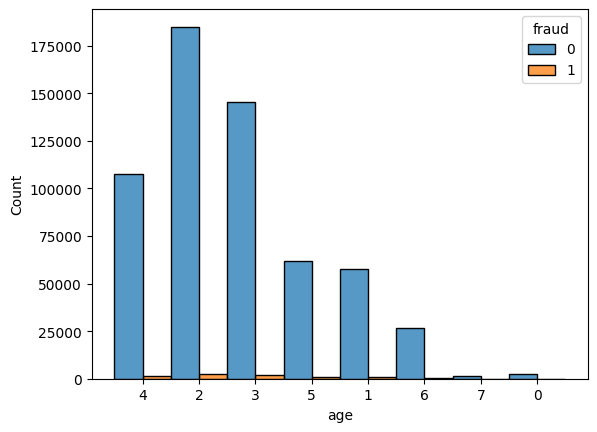

In [53]:
sns.histplot(df,x='age',hue='fraud', multiple='dodge' )
#can take 7 and 0?

<Axes: xlabel='age', ylabel='Count'>

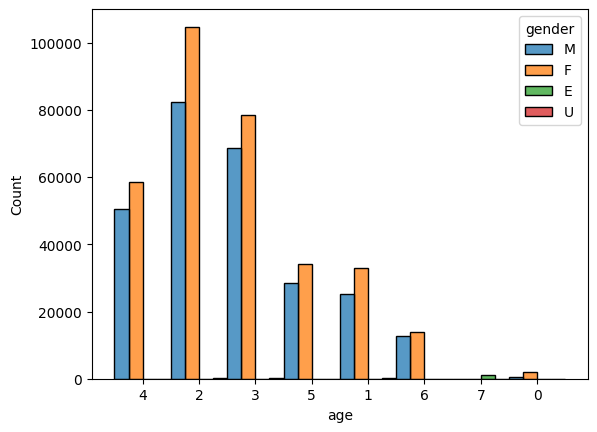

In [54]:
sns.histplot(df,x='age',hue='gender', multiple='dodge' )
#can take 7 and 0?

In [56]:
#convert age into integer
df['age'] = df['age'].astype(int)

In [167]:
print(df.age.value_counts())

2    187310
3    147131
4    109025
5     62642
1     58131
6     26774
0      2452
7      1178
Name: age, dtype: int64


In [57]:
# should we delete gender  and u"
mask = (df['age'] != 7) & (df['gender'] != 0)
mask
# Create a new DataFrame with the filtered rows
df= df[mask].copy()

# 'df_filtered' now contains only the rows where 'gender' is not 'e' or 'u'

# If you want to reset the index of the new DataFrame
df.reset_index(drop=True, inplace=True)


df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593465 entries, 0 to 593464
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      593465 non-null  int64  
 1   customer  593465 non-null  object 
 2   age       593465 non-null  int64  
 3   gender    593465 non-null  object 
 4   merchant  593465 non-null  object 
 5   category  593465 non-null  object 
 6   amount    593465 non-null  float64
 7   fraud     593465 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 36.2+ MB


In [58]:
print(df.age.value_counts())

2    187310
3    147131
4    109025
5     62642
1     58131
6     26774
0      2452
Name: age, dtype: int64


In [60]:
#identify counts in gender
print(df.gender.value_counts())

F    324565
M    268385
U       515
Name: gender, dtype: int64


In [61]:
# should we delete gender e and u"
mask = (df['gender'] != 'E') & (df['gender'] != 'U')
mask
# Create a new DataFrame with the filtered rows
df_filtered = df[mask].copy()

# 'df_filtered' now contains only the rows where 'gender' is not 'e' or 'u'

# If you want to reset the index of the new DataFrame
df_filtered.reset_index(drop=True, inplace=True)


df_filtered.info()
df_filtered



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592950 entries, 0 to 592949
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      592950 non-null  int64  
 1   customer  592950 non-null  object 
 2   age       592950 non-null  int64  
 3   gender    592950 non-null  object 
 4   merchant  592950 non-null  object 
 5   category  592950 non-null  object 
 6   amount    592950 non-null  float64
 7   fraud     592950 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 36.2+ MB


,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0
...,...,...,...,...,...,...,...,...
592945,179,C1753498738,3,F,M1823072687,es_transportation,20.53,0
592946,179,C650108285,4,F,M1823072687,es_transportation,50.73,0
592947,179,C123623130,2,F,M349281107,es_fashion,22.44,0
592948,179,C1499363341,5,M,M1823072687,es_transportation,14.46,0


In [62]:
print(df_filtered.gender.value_counts())

F    324565
M    268385
Name: gender, dtype: int64


In [63]:
#Amount 75 percentile has outliers set to < 50
df_filtered = df_filtered[df_filtered['amount'] < 500]

In [64]:
df_filtered.describe()

,step,age,amount,fraud
count,590787.000000,590787.000000,590787.000000,590787.000000
mean,95.015107,3.007300,33.419350,0.008663
std,51.053224,1.325543,36.359428,0.092671
min,0.000000,0.000000,0.000000,0.000000
25%,52.000000,2.000000,13.690000,0.000000
50%,97.000000,3.000000,26.810000,0.000000
75%,139.000000,4.000000,42.320000,0.000000
max,179.000000,6.000000,499.840000,1.000000


In [65]:
df_filtered.shape

(590787, 8)

In [66]:

#(594643, 10)
#preprocessing reduced columns to 8 and by
reduction = ((594643 -590787)/594643)

print('reduction in observations:',f"{reduction * 100:.2f}%")

reduction in observations: 0.65%


In [67]:
#Reccalulate number of fraud/non-fraud cases
# original [(0, 587443), (1, 7200)]
# when amount is filtered to 200 fraud counts falls by 60% [(0, 583082), (1, 2244)] . Probably need to open up longer tail to amount to get more fraud counts
# Opened to 500 added more fraud
print(sorted(Counter(df_filtered.fraud).items()))

[(0, 585669), (1, 5118)]


In [68]:
round(df_filtered.fraud[df_filtered.fraud == 1].count() /df.fraud[df.fraud == 1].count() , 2)

0.71

<Axes: xlabel='gender', ylabel='Count'>

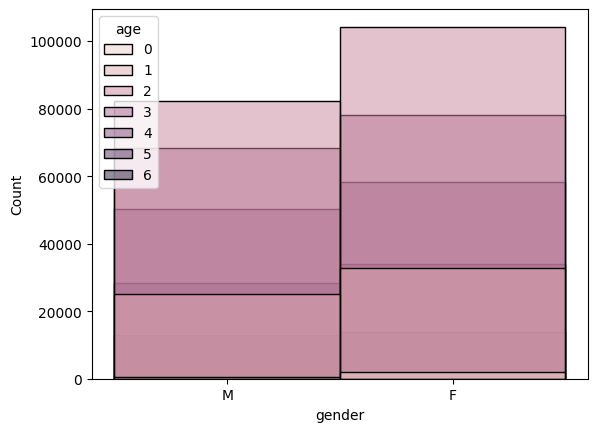

In [69]:
sns.histplot(df_filtered, x='gender', hue='age')

<Axes: xlabel='age', ylabel='Count'>

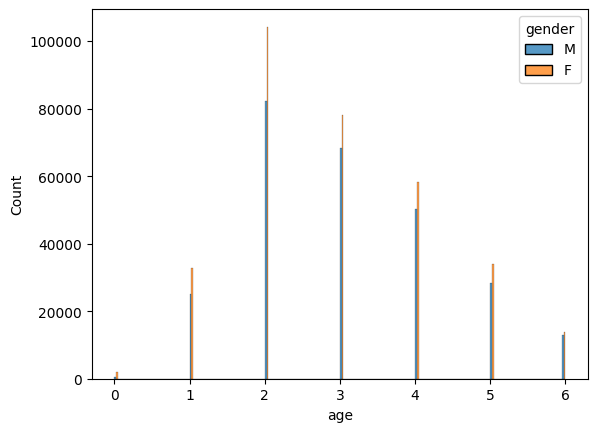

In [70]:
sns.histplot(df_filtered,x='age',hue='gender', multiple='dodge' )

<Axes: xlabel='amount', ylabel='Count'>

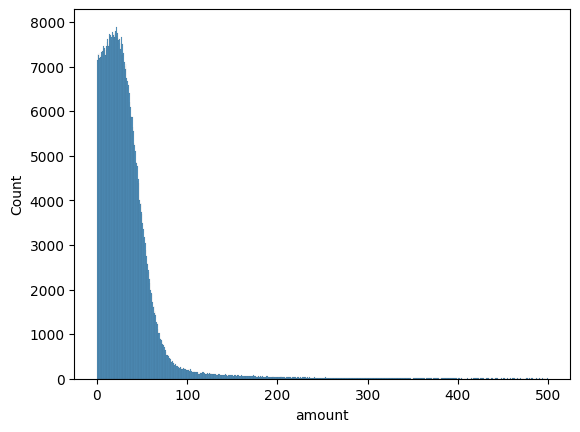

In [71]:
sns.histplot(df_filtered, x='amount')
# might get longer tail to make sure we get enough fraud

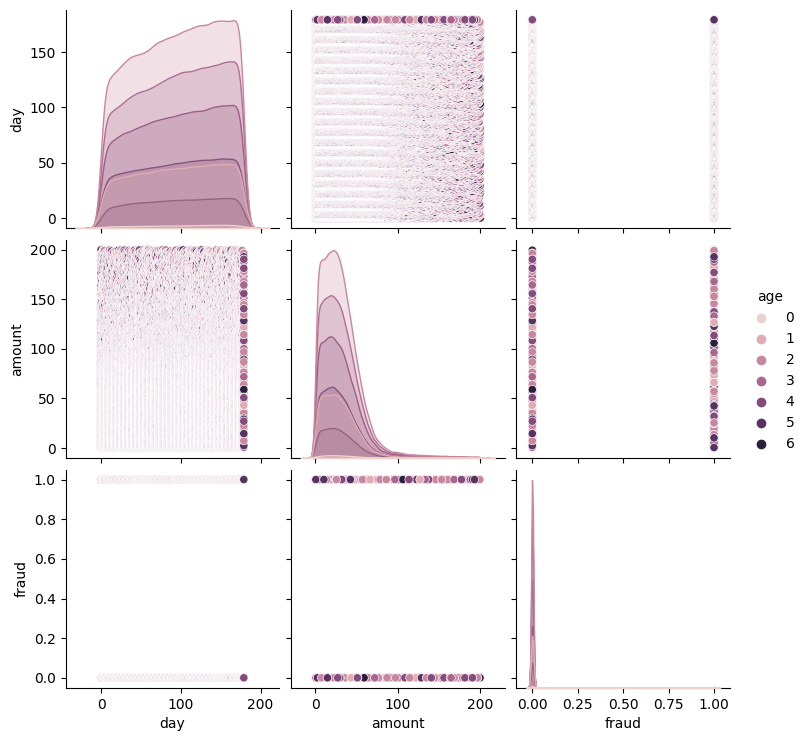

In [181]:
#df_plot=df.drop(['customer','merchant', 'category'], axis = 1)
sns.pairplot(df_filtered, hue='age')


<Axes: xlabel='amount', ylabel='category'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


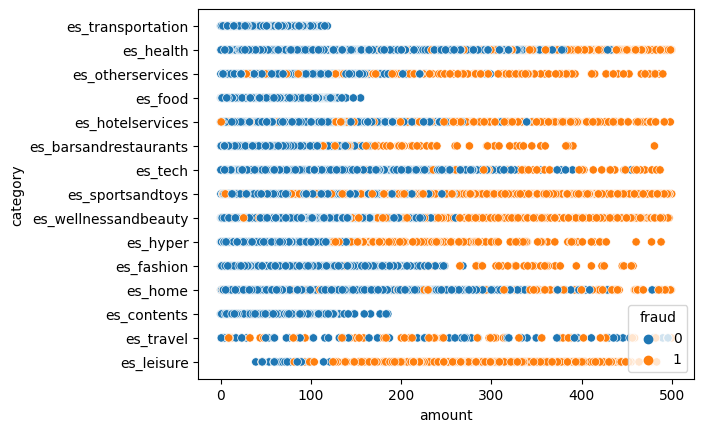

In [72]:
sns.scatterplot(data=df_filtered, x="amount", y="category", hue='fraud')
#by category fraund id prevelent in leisure>125, hyper 150
# NO Fraud in health, contents, transportation, food,
# for testing travel would be the best because the data is more evently ditributed among amount

<Axes: xlabel='amount', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


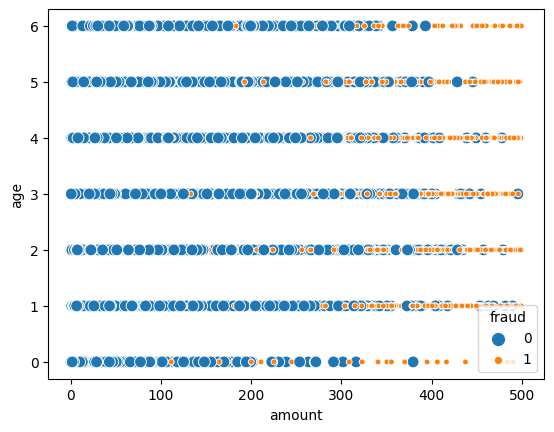

In [73]:
sns.scatterplot(data=df_filtered, x="amount", y="age", hue="fraud", size="fraud")

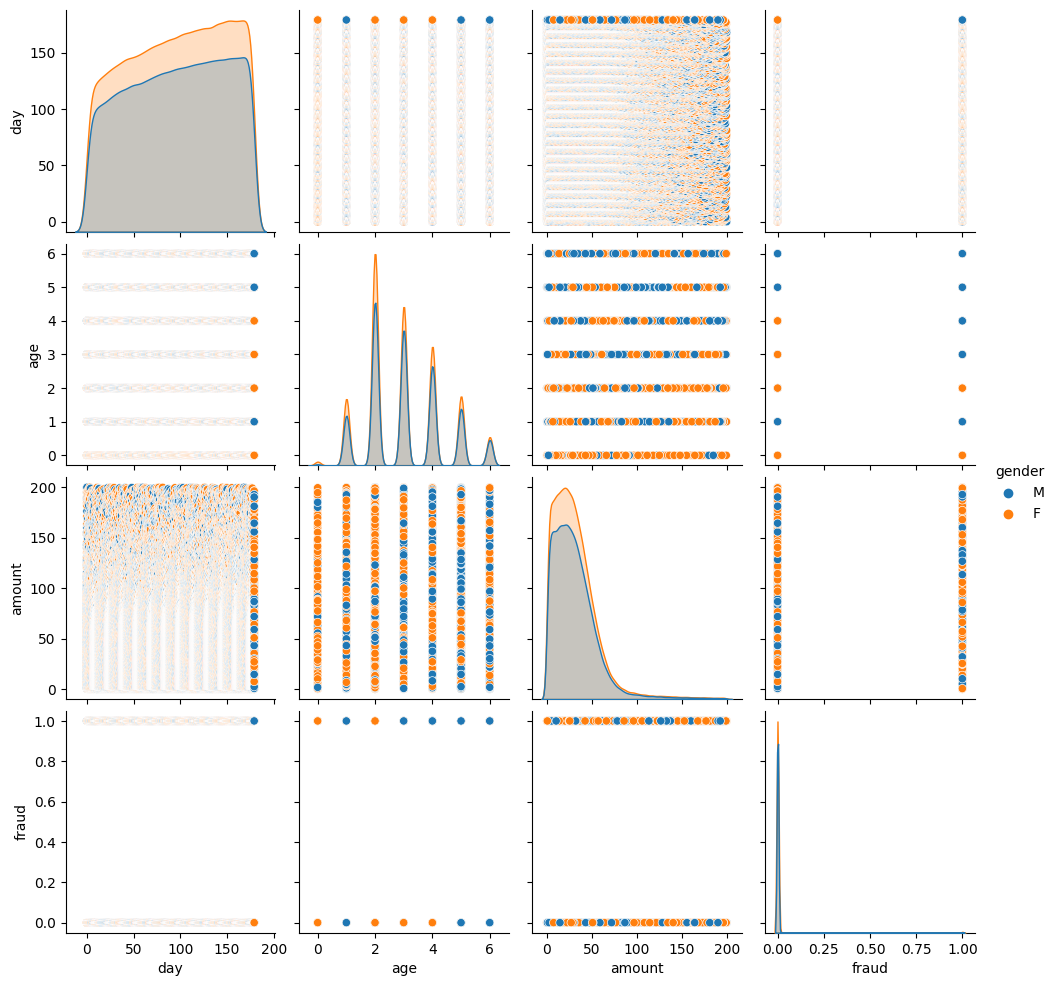

In [191]:
#df_plot=df.drop(['customer','merchant', 'category'], axis = 1)
sns.pairplot(df_filtered, hue='gender')


In [ ]:
X_smpl['fraud'] = Y_smpl

In [74]:
# convert gender into 0 and 1
df_filtered['gender'] = df_filtered['gender'].replace({'M': 1, 'F': 0}).astype(int)
df_filtered.head()

<ipython-input-74-0e5a838ee75a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gender'] = df_filtered['gender'].replace({'M': 1, 'F': 0}).astype(int)


,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,1,M348934600,es_transportation,4.55,0
1,0,C352968107,2,1,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,0,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,1,M348934600,es_transportation,17.25,0
4,0,C757503768,5,1,M348934600,es_transportation,35.72,0


In [75]:
#encode category for heatmap
df_filtered['category_encoded'] = df_filtered['category'].apply(lambda x: hash(x) % (10 ** 9))
df_filtered.head()

<ipython-input-75-adb9e8b10cad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category_encoded'] = df_filtered['category'].apply(lambda x: hash(x) % (10 ** 9))


,step,customer,age,gender,merchant,category,amount,fraud,category_encoded
0,0,C1093826151,4,1,M348934600,es_transportation,4.55,0,486469102
1,0,C352968107,2,1,M348934600,es_transportation,39.68,0,486469102
2,0,C2054744914,4,0,M1823072687,es_transportation,26.89,0,486469102
3,0,C1760612790,3,1,M348934600,es_transportation,17.25,0,486469102
4,0,C757503768,5,1,M348934600,es_transportation,35.72,0,486469102


In [ ]:
#heatmap to get correlations

#df_plot=df.drop(['customer','merchant', 'category'], axis = 1)
df_heatmap=df_filtered.drop(['merchant', 'customer', 'category'], axis=1)
sns.heatmap(df_heatmap, annot=True)

In [68]:
#undesample the non-fraud cases
random.seed(7406)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
X_smpl, Y_smpl = rus.fit_resample(X, Y)
print(sorted(Counter(Y_smpl).items()), Y_smpl.shape)

ValueError: ignored

In [ ]:
df_smpl = X_smpl.reset_index(drop=True, inplace=False)
df_smpl.head()

,day,customer,age,gender,merchant,category,amount,fraud
0,137,C1897313368,5,F,M1823072687,es_transportation,14.74,0
1,118,C1228157206,1,F,M1823072687,es_transportation,37.74,0
2,92,C1022530210,4,M,M348934600,es_transportation,66.44,0
3,82,C1303935849,2,M,M1823072687,es_transportation,32.73,0
4,130,C1911293580,5,M,M1823072687,es_transportation,16.72,0


In [12]:
X, Y = df.iloc[:,0:7], df.fraud